# Bangalore Rental Price EDA
Detailed step-by-step notebook.

## 1. Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='House_analysis_data_is_cleaned.csv'
df=pd.read_csv(file_path)
df.head()

,Title,Locality,Furnishing,Built_up_area,Lease_type,Available_from,Price,Bathrooms,Balcony,Carpet_area,Gas_Pipeline,Gate_Community,Floor_number,Total_floors,BHK_Number,Property_Title,Locality_area
0,2.5 BHK Flat for Rent,"Tirumanahalli, Bangalore",Semi Furnished,1265,Family / Bachelor / Company,Available now,42006,2,1.0,795.0,Yes,Yes,3.0,24.0,2.5,Flat,Tirumanahalli
1,1 BHK Flat for Rent,"BTM Layout, Bangalore",Fully Furnished,700,Family / Bachelor / Company,Available now,28500,1,1.0,600.0,Yes,Yes,5.0,7.0,1.0,Flat,BTM Layout
2,2 BHK Flat for Rent,"Mahadevapura, Bangalore",Semi Furnished,1185,Family / Bachelor / Company,"Nov, 2025",38000,2,1.0,850.0,No,No,3.0,4.0,2.0,Flat,Mahadevapura
3,3 BHK Flat for Rent,"Gunjur Village, Bangalore",Semi Furnished,1655,Family,Available now,65000,3,3.0,1304.0,No,Yes,26.0,30.0,3.0,Flat,Gunjur Village
4,1 RK Independent House for Rent,"Mahadevapura, Bangalore",Fully Furnished,400,Family / Bachelor,Available now,18000,1,1.0,850.0,No,No,3.0,6.0,1.0,Independent House,Mahadevapura


## 2. Data Info & Missing Values

In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           400 non-null    object 
 1   Locality        400 non-null    object 
 2   Furnishing      400 non-null    object 
 3   Built_up_area   400 non-null    int64  
 4   Lease_type      400 non-null    object 
 5   Available_from  400 non-null    object 
 6   Price           400 non-null    int64  
 7   Bathrooms       400 non-null    int64  
 8   Balcony         400 non-null    float64
 9   Carpet_area     400 non-null    float64
 10  Gas_Pipeline    400 non-null    object 
 11  Gate_Community  400 non-null    object 
 12  Floor_number    400 non-null    float64
 13  Total_floors    400 non-null    float64
 14  BHK_Number      400 non-null    float64
 15  Property_Title  400 non-null    object 
 16  Locality_area   400 non-null    object 
dtypes: float64(5), int64(3), object(9)


Title             0
Locality          0
Furnishing        0
Built_up_area     0
Lease_type        0
Available_from    0
Price             0
Bathrooms         0
Balcony           0
Carpet_area       0
Gas_Pipeline      0
Gate_Community    0
Floor_number      0
Total_floors      0
BHK_Number        0
Property_Title    0
Locality_area     0
dtype: int64

## 3. Convert Numeric Columns & Create Derived Metrics

In [3]:
num_cols=['Price','Carpet_area','Built_up_area','Bathrooms','Balcony','Floor_number','Total_floors','BHK_Number']
for c in num_cols:
    df[c]=pd.to_numeric(df[c],errors='coerce')

df['area_for_psqft']=df['Carpet_area'].fillna(df['Built_up_area'])
df['price_per_sqft']=df['Price']/df['area_for_psqft']
df.loc[~np.isfinite(df['price_per_sqft']),'price_per_sqft']=np.nan

df[['Price','area_for_psqft','price_per_sqft']].describe()

,Price,area_for_psqft,price_per_sqft
count,400.000000,400.000000,400.000000
mean,46719.607500,1006.707500,45.947341
std,48334.539344,654.330439,23.914020
min,13999.000000,400.000000,15.500000
25%,25000.000000,600.000000,31.764706
50%,34000.000000,850.000000,41.020672
75%,50000.000000,1100.000000,52.308673
max,550000.000000,6235.000000,198.949602


## 4. Univariate Plots

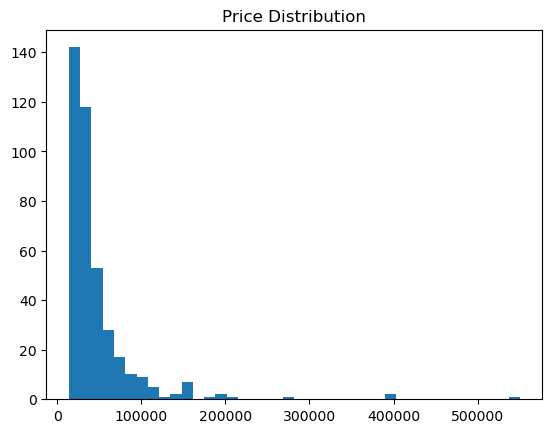

In [4]:
plt.hist(df['Price'].dropna(),bins=40)
plt.title('Price Distribution')
plt.show()

## 5. Bivariate Analysis

C:\Users\deven\AppData\Local\Temp\ipykernel_42132\2277481411.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,labels=sorted(bhk['BHK_Number'].unique()))


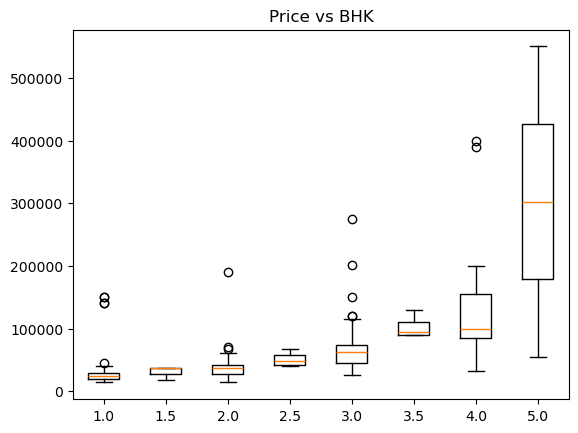

In [5]:
bhk=df[['BHK_Number','Price']].dropna()
data=[bhk[bhk['BHK_Number']==x]['Price'] for x in sorted(bhk['BHK_Number'].unique())]
plt.boxplot(data,labels=sorted(bhk['BHK_Number'].unique()))
plt.title('Price vs BHK')
plt.show()

## 6. Scatter Price vs Carpet Area

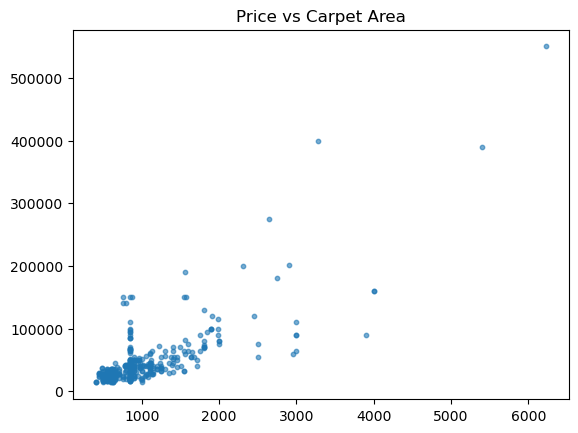

In [6]:
x=df['Carpet_area']; y=df['Price']
mask=~(x.isna()|y.isna())
plt.scatter(x[mask],y[mask],s=10,alpha=0.6)
plt.title('Price vs Carpet Area')
plt.show()